In [3]:
import numpy as np
import os
import sys
import h5py
import ncdm
import scales


In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams["figure.facecolor"]='w'
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

tabcolor=np.array(['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11'])

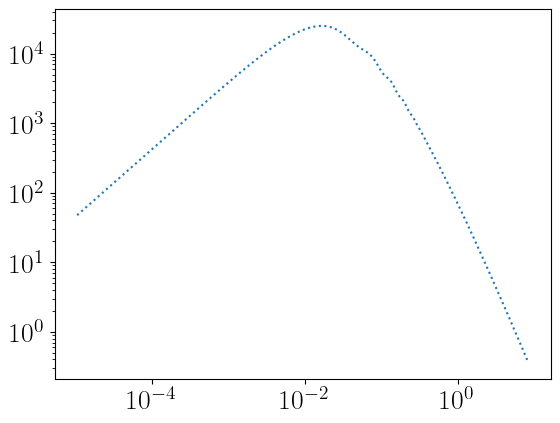

In [90]:
toL=np.transpose(np.loadtxt(pre+"PNG00_z1_pk.dat"))
plt.loglog(toL[0],toL[1],linestyle="dotted",label='CLASS') #plot lienar CLASS


alpha = 0.61194, beta = 2.000, gamma = 5.0
mhm = 1.40e+09 Msol/h, khm = 6.301e-01 h/Mpc
res = 3.906e+00 Mpc/h, Lhm = 9.971e+00 Mpc/h, Lhm/res=2.6e+00 ,Np = 1.663e+01 
kNy = 8.042e-01 h/Mpc, khm = 6.301e-01 h/Mpc, kNy/khm=1.3e+00 


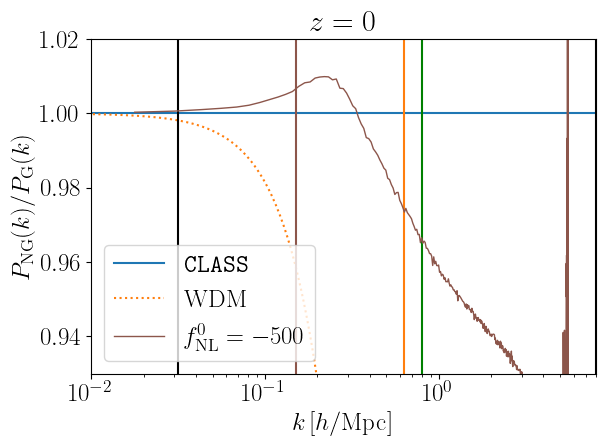

In [107]:
BoxSize    = 2000.0 #Mpc/h
res=BoxSize/512 #Mpc/h
kmin=2*np.pi/BoxSize
kNy=2*np.pi/BoxSize*512/2 #h/Mpc


# linear considerations
alpha = scales.alpha_wdm(omega_x=0.26, h=0.68, mx=.1) 
beta, gamma = 2, 5
#alphanew, betanew, gammanew = scales.alpha_beta_gamma_3_to_2_par(alpha, beta, gamma, gammamap=5.)
print("alpha = %.5f, beta = %.3f, gamma = %.1f" % (alpha, beta, gamma))
#print("alphanew = %.5f, betanew = %.3f, gammanew = %.1f" % (alphanew, betanew, gammanew))
mhm = scales.half_mode_mass(alphanew, betanew, gammanew)
khm=scales.k_half_mode(alpha, beta, gamma)
print("mhm = %.2e Msol/h, khm = %.3e h/Mpc" % (mhm,khm))



Lhm=2*np.pi/khm #Mpc/h
print("res = %.3e Mpc/h, Lhm = %.3e Mpc/h, Lhm/res=%.1e ,Np = %.3e " % (res,Lhm,(Lhm/res),(Lhm/res)**3))
print("kNy = %.3e h/Mpc, khm = %.3e h/Mpc, kNy/khm=%.1e " % (kNy,khm,(kNy/khm)))




 
pre="/home/stahl/PostDocStrasbourg/Scale/analysis/PS/class_out/"
toL=np.transpose(np.loadtxt(pre+"PNG00_z1_pk.dat"))
toNL=np.transpose(np.loadtxt(pre+"PNG00_z1_pk_nl.dat"))


 
plt.semilogx(toL[0],toL[1]/toL[1],label=r'$\texttt{CLASS}$') #plot lienar CLASS
plt.semilogx(toL[0],scales.transfer_ncdm(toL[0],alpha,beta),linestyle="dotted",label=r'${\rm WDM}$') #plot linear CLASS


#amod=0.82 #2305.09827 (Kids alone 2206.11794 0.69)
#amodp=0.86 #0.75 BARRES d'erreur à un sigma ?
#amodm=0.78 #0.63
#plt.semilogx(toNL[0],(toL[1]+amod*(toNL[1]-toL[1]))/toNL[1],label=r'${\rm 2305.09827}$',color="k", linewidth=2)
#plt.fill_between(toNL[0], (toL[1]+amodm*(toNL[1]-toL[1]))/toNL[1], (toL[1]+amodp*(toNL[1]-toL[1]))/toNL[1],color='grey',alpha=0.5)


plt.title(r"$z=0$")

#xlim = plt.xlim(xmin = 0.01, xmax = 5)
#ylim = plt.ylim(ymax = 1.1, ymin = 0.45)

plt.ylabel(r'$P_{\rm NG}(k)/P_{\rm G}(k)$')

plt.xlabel(r'$k\, [h/{\rm Mpc}]$')





plt.axvline(x = kmin, color = 'g', linestyle = '-')
plt.axvline(x = kNy, color = 'g', linestyle = '-')

BoxSize=200
kmin=2*np.pi/BoxSize
kNy=2*np.pi/BoxSize*512/2 #h/Mpc
plt.axvline(x = kmin, color = 'k', linestyle = '-')
plt.axvline(x = kNy, color = 'k', linestyle = '-')


plt.axvline(x = khm, color = tabcolor[1], linestyle = '-')
plt.axvline(x = 0.15, color = tabcolor[5], linestyle = '-')


atata=np.loadtxt("../../../Scale/S2/kANA.dat") 
plt.semilogx(atata[0],atata[4]/(atata[1]), linewidth=1,color=tabcolor[5],label=r"$f_{\rm NL}^0=-500$")
        

plt.xlim(0.01, kNy)
plt.ylim(0.93, 1.02)


plt.legend()

plt.tight_layout()
#plt.savefig("TOTOTOTTO.pdf")
plt.show()